<a href="https://colab.research.google.com/github/nikishkaaa/Intelligent_data_analysis-UNI/blob/main/IAD_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install opendatasets --upgrade --quiet

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew, kruskal
from sklearn.linear_model import LinearRegression
import opendatasets as od
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

In [20]:
dataset_url = 'https://www.kaggle.com/datasets/hellbuoy/car-price-prediction'

In [21]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: darianikishkina
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction


100%|██████████| 18.1k/18.1k [00:00<00:00, 19.3MB/s]

In [99]:
import os

# List files in the current directory
print(os.listdir('./'))

['.config', 'car-price-prediction', '__pycache__', 'weather-dataset-rattle-package', 'process_bank_churn.py', 'sample_data']


In [100]:
print(os.listdir('./car-price-prediction'))

['Data Dictionary - carprices.xlsx', 'CarPrice_Assignment.csv']


In [158]:
df = pd.read_csv('car-price-prediction/CarPrice_Assignment.csv')
df.head(5)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [102]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Univariate Analysis of Variance (ANOVA)

In [103]:
cat_var = 'fueltype'
continious_var = 'price'

groups = []
categories = df[cat_var].unique()
categories

array(['gas', 'diesel'], dtype=object)

In [104]:
for category in categories:
        group_data = df[df[cat_var] ==category][continious_var]
        groups.append(group_data)


In [105]:
f_statistic, p_value = stats.f_oneway(*groups)
f_statistic, p_value

(2.2927407366575174, 0.13153563336537924)

In [106]:
alpha = 0.05

if p_value < alpha:
        print("outliers are detected in the dataset")
else:
        print("no outliers are detected in the dataset.")

no outliers are detected in the dataset.


# ранговий однофакторний аналіз Краскела – Уолліса.

In [107]:
statistic, p_value = kruskal(*categories)
if p_value < alpha:
    print("Є сутєві відмінності ")
else:
    print("Відсутні суттеві відмінності між групами")

Відсутні суттеві відмінності між групами


In [108]:
statistic, p_value

(1.0, 0.31731050786291115)

# Кореляційний аналіз Пірсона та Спірмена


In [109]:
pearson_corr, _ = stats.pearsonr(df['horsepower'], df['price'])
pearson_corr

0.8081388225362216

In [110]:
spearman_corr, _ = stats.spearmanr(df['horsepower'], df['price'])
spearman_corr

0.8546096111609128

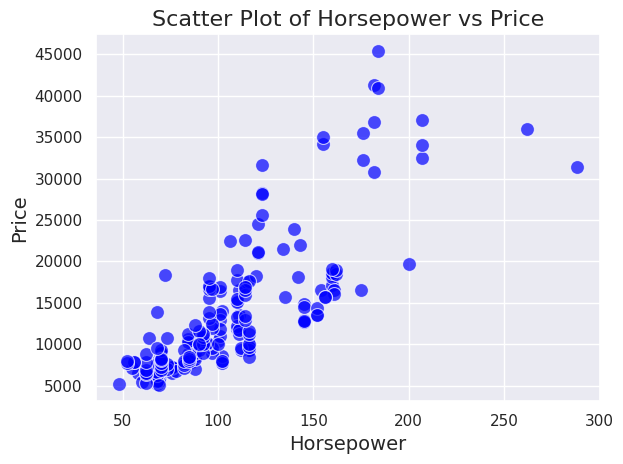

Кореляція по Пірсону 0.8081388225362216
Кореляція по Спірмену 0.8546096111609128


In [111]:
sns.set(style='darkgrid')
sns.scatterplot(
    x='horsepower',
    y='price',
    data=df,
    color='blue',
    marker='o',
    s=100,
    alpha=0.7,
    edgecolor='w',
)

plt.title('Scatter Plot of Horsepower vs Price', fontsize=16)
plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('Price', fontsize=14)


plt.grid(True)

plt.tight_layout()
plt.show()


print(f'Кореляція по Пірсону {pearson_corr}')
print(f'Кореляція по Спірмену {spearman_corr}')

In [117]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(exclude='object').drop('price', axis=1).columns.tolist()

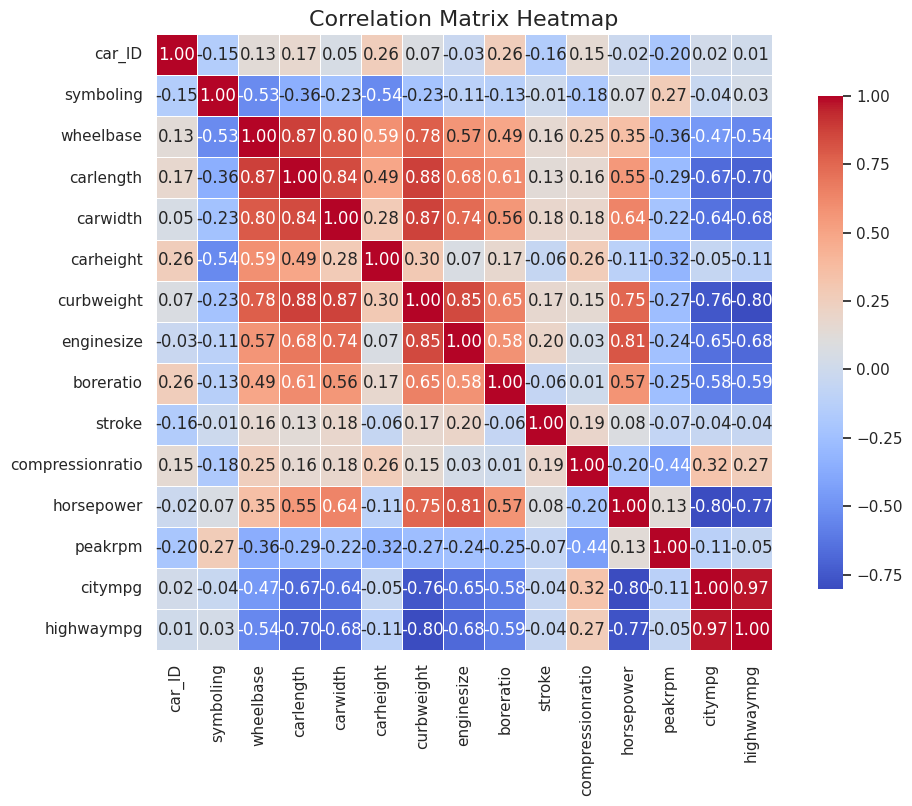

In [121]:
correlation_matrix = df[num_cols].corr()

plt.figure(figsize=(12, 8))

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .8}
)

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

# Model

In [113]:
X = df.drop('price', axis=1)
y = df['price']

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
numeric_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

cat_transformer = Pipeline(
    steps=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ]
)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer , num_cols),
        ('cat', cat_transformer, categorical_cols)
    ]
)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('reg', LinearRegression())
])

# Train the model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['car_ID', 'symboling',
                                                   'wheelbase', 'carlength',
                                                   'carwidth', 'carheight',
                                                   'curbweight', 'enginesize',
                                                   'boreratio', 'stroke',
                                                   'compressionratio',
                                                   'horsepower', 'peakrpm',
                                                   'citympg', 'highwaympg']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['CarName', 'fueltype',
                                                   'aspiration', 'doornumber',
                                                   'carbody', 'drivewheel',
                                                   'enginelocation',
                                                   'enginetype',
                                                   'cylindernumber',
                                                   'fuelsystem'])])),
                ('reg', LinearRegression())])

In [130]:
preds_train = model_pipeline.predict(X_train)
preds_test = model_pipeline.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, preds_train))
rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))

print(f"RMSE = {rmse_train }")
print(f"RMSE = {rmse_test }")


RMSE = 356.25838030365736
RMSE = 525267025237123.4


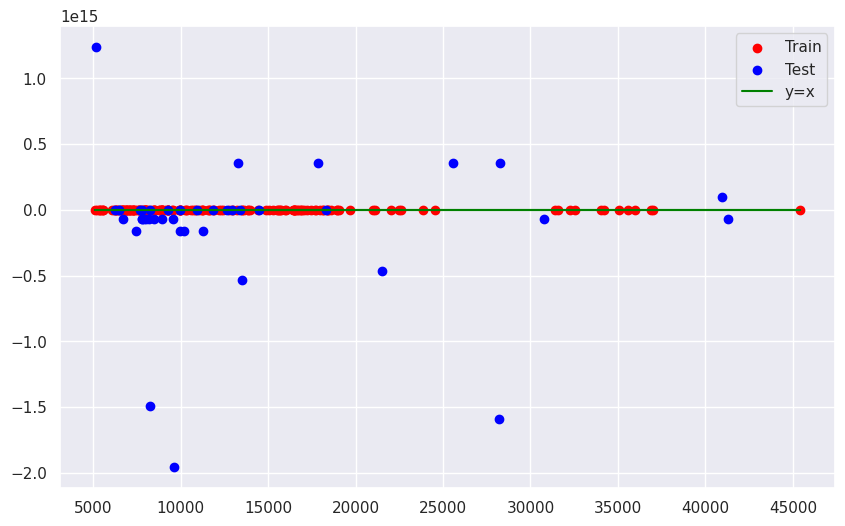

In [143]:

plt.figure(figsize=(10, 6))
plt.scatter(y_train, preds_train, color='red', label='Train')
plt.scatter(y_test, preds_test, color='blue', label='Test')
plt.plot(y_train, y_train, color='green', label='y=x')
plt.legend()
plt.grid(True)
plt.show()